In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from pyod.models.knn import KNN
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

In [3]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока_2.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1,0,0,0,0,1,0,1,0,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0,1,0,1,0,0,0,0,1,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1,0,0,1,0,0,0,1,0,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0,1,0,1,0,0,0,1,0,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0,1,0,0,0,1,1,0,0,0


1. Выборка 1 - без исключения выбросов (с учетом нормализации и стандартизации).
2. Выборка 2 - исключение экстремальных выбросов.
3. Выборка 3 - исключение выбросов по общей площади и цене.
4. Выборка 4 - исключение выбросов по логарифмированным общей площади и цене.
5. Выборка 5 - исключение выбросов алгоритмом KNN.

<font size = 3><div style="text-align: justify">**Выборка 1:**</div></font>

In [16]:
df_v1 = df.copy()
len(df_v1)

2399

<font size = 2><div style="text-align: justify">**RandomForest:**</div></font>

In [ ]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
%%time

rf = RandomForestRegressor()

br = BaggingRegressor(base_estimator = rf, 
                      n_estimators = 150, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.885
Test R2 0.861
Разница 0.025
MAE train: 0.128
MAE test: 0.140
CPU times: total: 51.5 s
Wall time: 51.6 s


In [ ]:
br.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.2,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

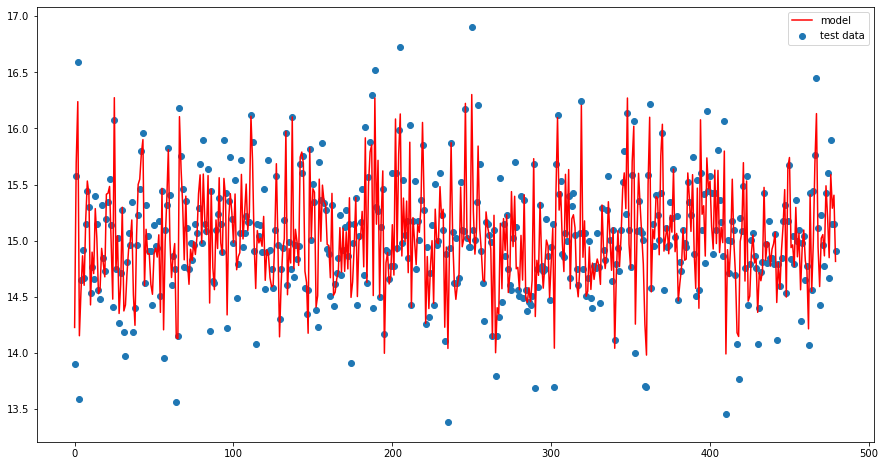

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='test data')
plt.legend();

In [ ]:
cv_score = cross_val_score(br, X_train, Y_train, cv = 5)
print("CV mean score:", cv_score.mean())

CV mean score: 0.8437720479840973


<font size = 2><div style="text-align: justify">**GridSearchCV:**</div></font>

In [ ]:
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
df.shape[0], df.shape[0]

(2399, 2399)

In [ ]:
%%time
#None = DecisionTreeRegressor
#n_samples = df.shape[0]
#n_features = df.shape[1]

base_estimator = RandomForestRegressor() #KNeighborsRegressor(), CatBoostRegressor(), XGBRegressor(),

param_grid = {#'base_estimator': [None, RandomForestRegressor()],
              'n_estimators': [20, 50, 100, 150, 200], #количество оценщиков (моделей), которые будут объединяться
              'max_samples': [0.15, 0.25, 0.5, 1.0], #доля используемых данных для bootstrap, n_samples//2
              #'max_features': [0.5, 1.0, n_features//2], #доля используемых фичей
              'bootstrap': [True, False],
              #'bootstrap_features': [True, False]
              }

brg = GridSearchCV(BaggingRegressor(base_estimator = base_estimator, random_state = 1, n_jobs = -1), 
                                    param_grid = param_grid, 
                                    cv = 3, 
                                    n_jobs = -1, 
                                    verbose = 1)

brg.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'% brg.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'% brg.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'% brg.best_score_)
print('Best Parameters : ', brg.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Train R^2 Score : 0.985
Test R^2 Score : 0.887
Best R^2 Score Through Grid Search : 0.875
Best Parameters :  {'bootstrap': False, 'max_samples': 1.0, 'n_estimators': 200}
CPU times: total: 4min 46s
Wall time: 1h 12min 58s


In [ ]:
cross_val_results = pd.DataFrame(brg.cv_results_)
print('Number of Various Combinations of Parameters Tried: %d'% len(cross_val_results))

cross_val_results.head()

Number of Various Combinations of Parameters Tried: 40


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.665080,0.142381,0.265562,0.012753,True,0.15,20,"{'bootstrap': True, 'max_samples': 0.15, 'n_es...",0.833772,0.818832,0.818263,0.823622,0.007181,37
1,8.998119,0.175595,0.805749,0.070685,True,0.15,50,"{'bootstrap': True, 'max_samples': 0.15, 'n_es...",0.835748,0.819538,0.815980,0.823755,0.008603,36
2,18.069148,0.454869,1.549753,0.068228,True,0.15,100,"{'bootstrap': True, 'max_samples': 0.15, 'n_es...",0.836347,0.821378,0.813036,0.823587,0.009644,38
3,27.570563,0.284884,2.184307,0.052327,True,0.15,150,"{'bootstrap': True, 'max_samples': 0.15, 'n_es...",0.835156,0.820743,0.811223,0.822374,0.009838,40
4,33.549518,0.246523,3.129062,0.125617,True,0.15,200,"{'bootstrap': True, 'max_samples': 0.15, 'n_es...",0.835568,0.820169,0.811684,0.822473,0.009886,39


In [ ]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Bagging_Киров_1.xlsx')
cross_val_results.to_excel(writer, 'bgr')
writer.save()

<font size = 2><div style="text-align: justify">**KNeighborsRegressor:**</div></font>

In [ ]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
%%time

knn = KNeighborsRegressor()

br = BaggingRegressor(base_estimator = knn, 
                      n_estimators = 150, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.775
Test R2 0.754
Разница 0.021
MAE train: 0.181
MAE test: 0.191
CPU times: total: 20.3 s
Wall time: 5.57 s


<font size = 2><div style="text-align: justify">**XGBRegressor:**</div></font>

In [ ]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
%%time

xgb = XGBRegressor()

br = BaggingRegressor(base_estimator = xgb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.930
Test R2 0.908
Разница 0.022
MAE train: 0.100
MAE test: 0.117
CPU times: total: 1min 47s
Wall time: 27.6 s


In [ ]:
br.get_params()

{'base_estimator__objective': 'reg:squarederror',
 'base_estimator__base_score': None,
 'base_estimator__booster': None,
 'base_estimator__callbacks': None,
 'base_estimator__colsample_bylevel': None,
 'base_estimator__colsample_bynode': None,
 'base_estimator__colsample_bytree': None,
 'base_estimator__early_stopping_rounds': None,
 'base_estimator__enable_categorical': False,
 'base_estimator__eval_metric': None,
 'base_estimator__gamma': None,
 'base_estimator__gpu_id': None,
 'base_estimator__grow_policy': None,
 'base_estimator__importance_type': None,
 'base_estimator__interaction_constraints': None,
 'base_estimator__learning_rate': None,
 'base_estimator__max_bin': None,
 'base_estimator__max_cat_to_onehot': None,
 'base_estimator__max_delta_step': None,
 'base_estimator__max_depth': None,
 'base_estimator__max_leaves': None,
 'base_estimator__min_child_weight': None,
 'base_estimator__missing': nan,
 'base_estimator__monotone_constraints': None,
 'base_estimator__n_estimators'

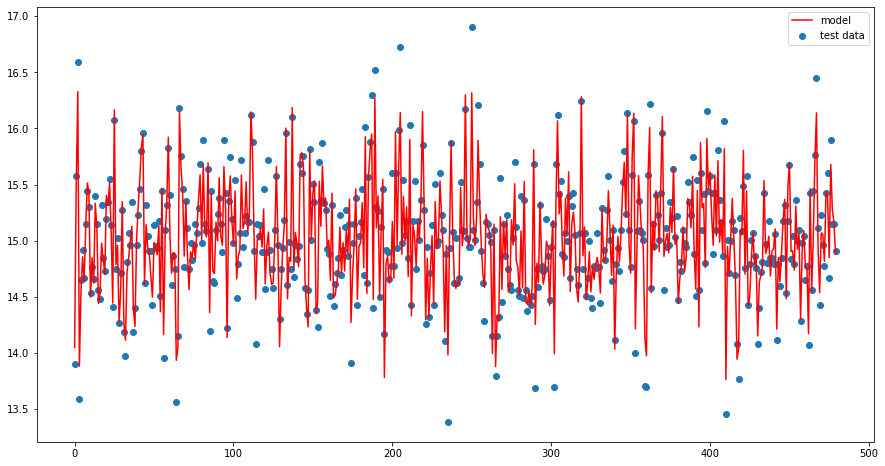

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='test data')
plt.legend();

In [ ]:
cv_score = cross_val_score(br, X_train, Y_train, cv = 5)
print("CV mean score:", cv_score.mean())

CV mean score: 0.8881855532298948


In [29]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
#X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
%%time

xgb = XGBRegressor()

br = BaggingRegressor(base_estimator = xgb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.930
Test R2 0.908
Разница 0.022
MAE train: 0.100
MAE test: 0.117
CPU times: total: 53.2 s
Wall time: 13.6 s


In [31]:
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
mms_2 = StandardScaler()
mms_2.fit(X_train)

StandardScaler()

In [33]:
X_train_std = pd.DataFrame(mms_2.transform(X_train), columns = X_train.columns)
X_train_std

,LN(Общая площадь),Площадь кухни,Этажей в доме,Хронологический возраст,Долгота,Широта,дизайнерский,евро,косметический,требует ремонта
0,-0.855906,-0.083902,-0.603916,-1.163387,-1.644071,-0.259628,-0.283757,-0.663845,1.149102,-0.482181
1,-0.310568,0.367422,1.285106,-0.881412,0.029550,-0.572831,-0.283757,-0.663845,1.149102,-0.482181
2,-0.810547,-0.101955,1.285106,-0.928408,0.848453,2.046995,-0.283757,-0.663845,1.149102,-0.482181
3,1.220175,-0.282485,0.151693,0.387477,-1.042130,0.416620,-0.283757,-0.663845,1.149102,-0.482181
4,-1.037953,-0.643544,-0.037210,0.763444,-0.358958,0.638536,-0.283757,-0.663845,1.149102,-0.482181
...,...,...,...,...,...,...,...,...,...,...
1914,-0.268129,-0.643544,-0.792818,1.703362,-0.320211,-0.385173,-0.283757,-0.663845,1.149102,-0.482181
1915,0.220938,-0.101955,0.151693,-0.646432,0.759439,-0.177691,-0.283757,1.506375,-0.870245,-0.482181
1916,-2.037190,-0.463014,-0.037210,0.387477,0.387816,0.723955,-0.283757,-0.663845,1.149102,-0.482181
1917,1.200381,0.547951,1.474008,-0.740424,-0.006431,-0.671785,-0.283757,1.506375,-0.870245,-0.482181


In [34]:
X_test_std = pd.DataFrame(mms_2.transform(X_test), columns = X_test.columns)
X_test_std

,LN(Общая площадь),Площадь кухни,Этажей в доме,Хронологический возраст,Долгота,Широта,дизайнерский,евро,косметический,требует ремонта
0,-1.381153,-0.505138,-0.792818,0.434473,-3.915752,-1.979241,-0.283757,1.506375,-0.870245,-0.482181
1,1.143417,1.342281,1.285106,-1.116391,0.801345,2.159764,-0.283757,1.506375,-0.870245,-0.482181
2,2.878595,0.800692,-0.792818,-0.176473,0.876837,0.541267,3.524143,-0.663845,-0.870245,-0.482181
3,-0.127935,-0.643544,-1.359525,1.562375,-3.954892,-1.942962,-0.283757,-0.663845,-0.870245,2.073911
4,-1.005311,-0.643544,-0.792818,1.186407,-0.691833,0.423444,-0.283757,-0.663845,1.149102,-0.482181
...,...,...,...,...,...,...,...,...,...,...
475,0.010087,-0.463014,-0.792818,1.327395,-0.015514,-0.162556,-0.283757,-0.663845,1.149102,-0.482181
476,1.889396,-0.083902,-0.981720,0.152498,0.684895,0.171988,-0.283757,-0.663845,1.149102,-0.482181
477,0.996765,-0.101955,-0.037210,0.340481,0.737185,0.661954,-0.283757,-0.663845,-0.870245,2.073911
478,2.779389,0.475739,-1.359525,2.878259,0.253180,1.040415,-0.283757,-0.663845,-0.870245,2.073911


In [35]:
%%time

xgb = XGBRegressor()

br = BaggingRegressor(base_estimator = xgb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train_std, Y_train)

pred_train = br.predict(X_train_std)
pred_test = br.predict(X_test_std)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.930
Test R2 0.908
Разница 0.022
MAE train: 0.100
MAE test: 0.117
CPU times: total: 53.1 s
Wall time: 13.6 s


<font size = 2><div style="text-align: justify">**CatBoostRegressor:**</div></font>

In [ ]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
%%time

ctb = CatBoostRegressor()

br = BaggingRegressor(base_estimator = ctb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

#Train R2 0.927
#Test R2 0.905
#Разница 0.022

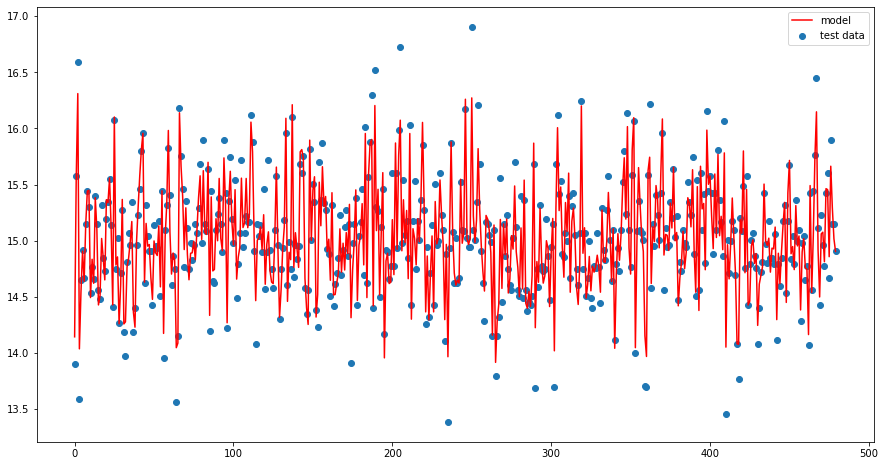

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='test data')
plt.legend();

In [ ]:
cv_score = cross_val_score(br, X_train, Y_train, cv = 5)
print("CV mean score:", cv_score.mean())
#средний R2 = 0,82

<font size = 3><div style="text-align: justify">**Вывод по выборке 1:**</div></font>

Наилучший результат дал алгоритм XGBRegressor: на обучении 0,93, на тесте 0,908, кросс-валиация 0,888. Цена и общая площадь - логарифмированы (цену можно не логарифмировать). Выбросы не исключались. Также, хороший результат дает алгоритм CatBoostRegressor: на обучении 0,927, на тесте 0,905, кросс-валиация 0,82. Нормализация и стандартизация на результате не сказываются.

<font size = 3><div style="text-align: justify">**Выборка 2:**</div></font>

In [4]:
df_v2 = df.copy()
len(df_v2)

2399

In [5]:
df_v2 = df.loc[df['Общая площадь'] < 175]
df_v2 = df_v2.loc[df_v2['Площадь кухни'] < 45]
df_v2 = df_v2.loc[df_v2['Жилая площадь'] < 80]
df_v2 = df_v2.loc[df_v2['Хронологический возраст'] < 100]
df_v2 = df_v2.loc[df_v2['Цена'] < 14800000]
len(df_v2)

2367

In [6]:
#X = df_v2[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v2[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
%%time

xgb = XGBRegressor()

br = BaggingRegressor(base_estimator = xgb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.930
Test R2 0.894
Разница 0.037
MAE train: 0.097
MAE test: 0.123
CPU times: total: 1min 4s
Wall time: 16.4 s


<font size = 3><div style="text-align: justify">**Вывод по выборке 2:**</div></font>

Исключение экстремальных выбросов из данных не привело к улучшению модели.

<font size = 3><div style="text-align: justify">**Выборка 3:**</div></font>

In [12]:
df_v3 = df.copy()
len(df_v3)

2399

In [13]:
df_v3 = df.loc[df['Общая площадь'] < 90]
df_v3 = df_v3.loc[df_v3['Хронологический возраст'] < 100]
df_v3 = df_v3.loc[df_v3['Цена'] < 6000000]
df_v3 = df_v3.loc[df_v3['Площадь кухни'] < 30]
len(df_v3)

2075

In [14]:
#X = df_v3[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v3[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v3['Цена']
Y = df_v3['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
%%time

xgb = XGBRegressor()

br = BaggingRegressor(base_estimator = xgb, 
                      n_estimators = 100, 
                      bootstrap = True, 
                      max_samples = 0.20, 
                      random_state = 1)

br.fit(X_train, Y_train)

pred_train = br.predict(X_train)
pred_test = br.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
print(f'Разница {r2_score(Y_train, pred_train) - r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.3f}')
print(f'MAE test: {mae(Y_test, pred_test):.3f}')

Train R2 0.893
Test R2 0.864
Разница 0.028
MAE train: 0.095
MAE test: 0.109
CPU times: total: 55.9 s
Wall time: 14.1 s


<font size = 3><div style="text-align: justify">**Вывод по выборке 3:**</div></font>

Исключение выбросов (324 квартиры, более 10%) из данных привело к ухудшению модели.

<font size = 3><div style="text-align: justify">**Выборка 4, 5:**</div></font>

Исключение выбросов также приведет к ухудшению модели.

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regressor = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=4),
    Ridge(alpha=1e-10),
    )

In [ ]:
bagging = BaggingRegressor(
    base_estimator=polynomial_regressor,
    n_estimators=100,
    random_state=0,
    )

In [ ]:
BaggingRegressor(base_estimator=None, 
                 n_estimators=10, 
                 max_samples=1.0, 
                 max_features=1.0, 
                 bootstrap=True, 
                 bootstrap_features=False, 
                 oob_score=False, 
                 warm_start=False, 
                 n_jobs=None, 
                 random_state=None, 
                 verbose=0)